# MA124 Maths by Computer: Assignment 4

###### Name: Alan Thanickal
###### ID No: 2103793

## Machine Learning Applied to Bike Sharing Demand Data

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility. It is
important to make the rental bike accessible to the public, and reduce waiting time. This project
discusses the models for hourly rental bike demand prediction. Data used factors like weather, and 
time of day and month of the year. Machine learning (incl. linear regression) were employed to carry
about this analysis to identify the most significant predictors and the relationships between factors, 
and predict availablity of bikes and different times.
 
In a recent research article published in the journal Computer Communications, authors
Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count
required at each hour for the stable supply of rental bikes". They employed several
regression models, including linear regression. The dataset used in the original study is
available below.

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read the iris.csv file to DataFrame iris
SeoulBikeData_mod = pd.read_csv("SeoulBikeData_mod.csv") 

In [3]:
# describe the data
SeoulBikeData_mod.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


In [4]:
print(type(SeoulBikeData_mod))

<class 'pandas.core.frame.DataFrame'>


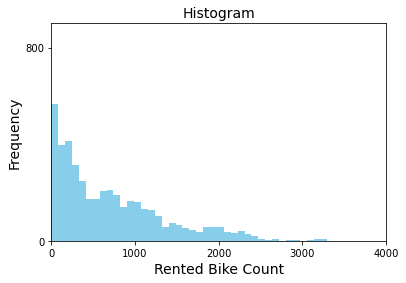

In [5]:
my_Series = SeoulBikeData_mod['Rented Bike Count']

plt.hist(my_Series, bins=100, density=True)

x = [my_Series]
plt.hist(x, bins = 40, color = "skyblue")
plt.title("Histogram", fontsize=14)
plt.xticks(np.arange(0, 5000, 1000))
plt.yticks(np.arange(0, 900, 800))
plt.ylim(0, 900)
plt.xlim(0, 4000)
plt.xlabel("Rented Bike Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Histogram shows the number of bikes rented and the frequency (count) of often it occurred.

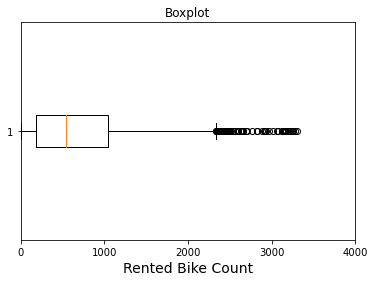

In [6]:
# Creating plot
plt.boxplot(my_Series, vert=False)
plt.xlabel("Rented Bike Count", fontsize=14)
plt.xticks(np.arange(0, 5000, 1000))
plt.xlim(0, 4000)
plt.title('Boxplot')
plt.show()

# Boxplot displays the position of the median value in the black line. As can be
# seen, there is a long tail in the data distribution. In the box plot, the
# median is represented inside the blue rectangle by the thick orange line

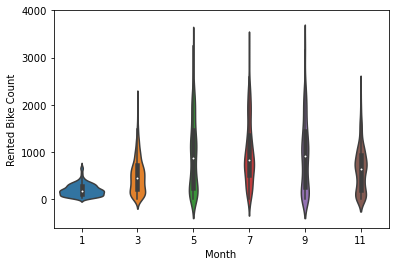

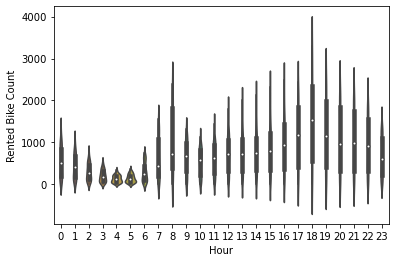

In [7]:
sns.violinplot(y='Rented Bike Count', x='Month', data=SeoulBikeData_mod)
plt.yticks(np.arange(0, 5000, 1000))
plt.show()

sns.violinplot(y='Rented Bike Count', x='Hour', data=SeoulBikeData_mod)
plt.yticks(np.arange(0, 5000, 1000))
plt.show()


# The violin plot the frequency of how often bikes were rented during the odd months
# (1st plot) and across the hours each day. The thickness of a region is proportional
# to the commonality of bikes rented.

In [8]:
X = SeoulBikeData_mod.drop(['Rented Bike Count'], axis=1)
y = SeoulBikeData_mod['Rented Bike Count']

# 75% of the final data is utilized for model training and the remaining 25% of the data is 
# used for testing purpose, as stated in the report.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data and create residual as defined
y_pred = regr.predict(X_test)
resid = y_test - y_pred

In [9]:
# We now look at the four performance metrics. These are scalar measures 
# of how well `y_test` and `y_pred` agree.

r2 = r2_score(y_test, y_pred)
print("r2 value is",r2)

# For r2, bigger is better. r2=1 corresponds to perfect predictions, ie. `y_pred = y_test`
# in our case r2 is 0.46 (to 2 dp), which implies that our linear regression is not very accurate.

RMSE = np.sqrt(np.mean(resid**2))
print("Root Mean Square Value value is",RMSE)

MAE = np.mean(np.abs(resid))
print("Mean Absolute Error is",MAE)

CV = 100 * RMSE/np.mean(y_test)
print("Coefficient of Variation is",round(CV),"%")

r2 value is 0.48717128632345885
Root Mean Square Value value is 453.1279184145084
Mean Absolute Error is 329.0737686055396
Coefficient of Variation is 66 %


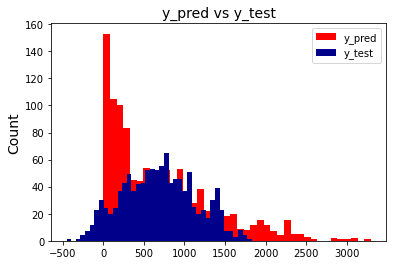

In [10]:
# this histogram will allow us to clearly see the variations 
# in our predicted data compared with known results

plt.hist(my_Series, bins=100, density=True)

yt = [y_test]
yp = [y_pred]
plt.hist(yt, bins = 40, color = "red", label='y_test')
plt.hist(yp, bins = 40, color = "darkblue", label='y_pred')
plt.legend(['y_pred', 'y_test']);
plt.title("y_pred vs y_test", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

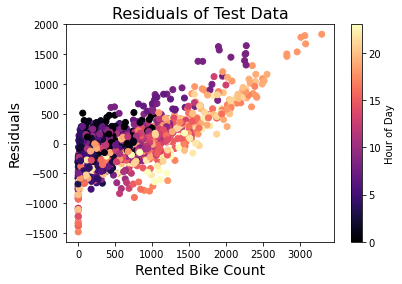

In [11]:
# The residual is the difference between exact and approximate values. In our 
# machine-learning examples, the residual is just `y_test - y_pred`.

# Here we measure the residuals based on the number of bikes that were rented.
# The colour indicates the hour of the day as shown by the colourbar

r = X_test['Hour']
plt.scatter(y_test, resid, c=r, cmap='magma')
plt.colorbar(label="Hour of Day", orientation="vertical")
plt.xlabel("Rented Bike Count", fontsize="14")
plt.ylabel("Residuals", fontsize="14")
plt.title("Residuals of Test Data", fontsize="16")
plt.show()

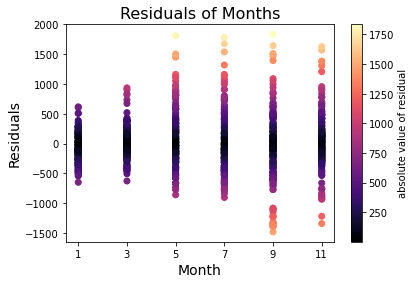

In [12]:
# Here we measure the residuals based on the month of the year.
# The colour indicates the absolute value of residuals as shown by the colourbar

s = abs(resid)
plt.scatter(X_test['Month'] , resid, c=s, cmap='magma')
plt.colorbar(label="absolute value of residual", orientation="vertical")
plt.xlabel("Month", fontsize="14")
plt.ylabel("Residuals", fontsize="14")
plt.xticks(np.arange(1, 13, 2))
plt.title("Residuals of Months", fontsize="16")
plt.show()

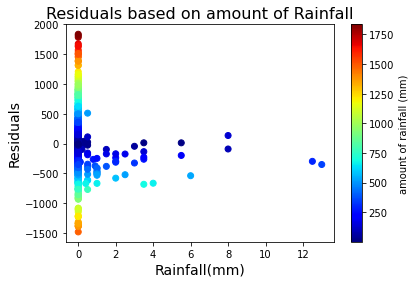

In [13]:
# Here we measure the residuals based on the amount of rainfall.
# The colour indicates the absolute value of residuals as shown by the colourbar

t = abs(resid)
plt.scatter(X_test['Rainfall(mm)'] , resid, c=t, cmap='jet')
plt.colorbar(label="amount of rainfall (mm)", orientation="vertical")
plt.xlabel("Rainfall(mm)", fontsize="14")
plt.ylabel("Residuals", fontsize="14")
plt.title("Residuals based on amount of Rainfall", fontsize="16")
plt.show()

# Challenge Section

r2 value is 0.7733950447697029
Root Mean Square Value is 301.2099787332714
Mean Absolute Error is 177.67533913766442
Coefficient of Variation is 44 %


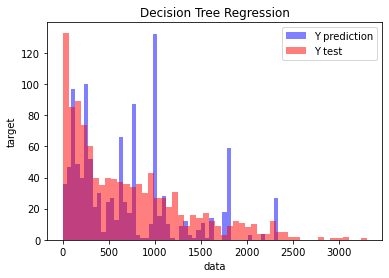

In [14]:
# Decision tree builds regression or classification models in the 
# form of a tree structure and is an alternate method to linear 
# regression to learn and predict data.

# Fit regression model
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X, y)

# Predict
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("r2 value is",r2)

# Here we see the r2 value is 0.75 (to 2 dp), meaning it is 
# much more is much more accurate than linear regression

MSE = np.mean((y_test - y_pred)**2)
RMSE = np.sqrt(MSE)
print("Root Mean Square Value is", RMSE)

MAE = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error is",MAE)

CV = 100 * RMSE/np.mean(y_test)
print("Coefficient of Variation is",round(CV),"%")

plt.figure()
plt.hist(y_pred,bins=50,label="Y prediction",alpha = 0.5, lw=3, color= 'b')
plt.hist(y_test,bins=50,label="Y test",alpha = 0.5, lw=3, color= 'r')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# this histogram will allow us to clearly see the variations 
# in our predicted data compared with known results

# Conclusion

I only used a subset of the data that the researchers of the original study used (I had data for the even months of the year, so my data size was approximately about half of the orginal data set. However it was still enough to apply machine learning techniques, like linear regression to train and test data and check its accuracy. From the paper, we see the researchers' test data has a R2 value of 0.55, while my R2 value (using linear regression) was about 0.46. This means my data was less accurate than the researchers but this could be explained by my shortage of data points (i.e the even months). However, my decision tree regression model produced a R2 value of 0.75. Even looking at the other performance metrics, we see that the RMSE and MAE (and therefore the CV percentage) were much lower using the decision tree regression model. Clearly the decision tree regression model is a more accurate predictor of data in this circumstance. Finally, I noticed that most of the outcomes generated by my and the researchers' work of linear regression models were similar, which is what I expected since I used a subset of their data.